Starting Brainwave Thought Recognition Simulation...

Stage 1: FFT Frequency Analysis


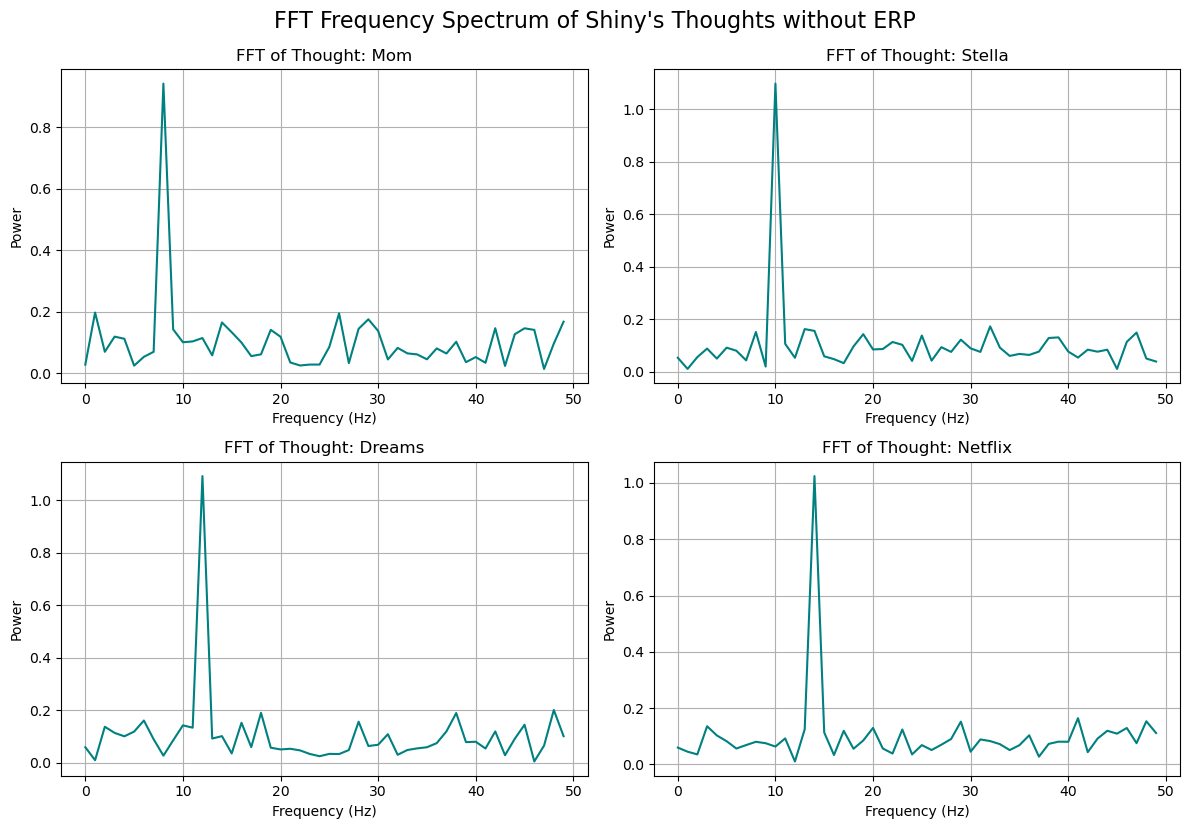


Stage 2 & 3: FFT with ERP & Time-Domain Plots


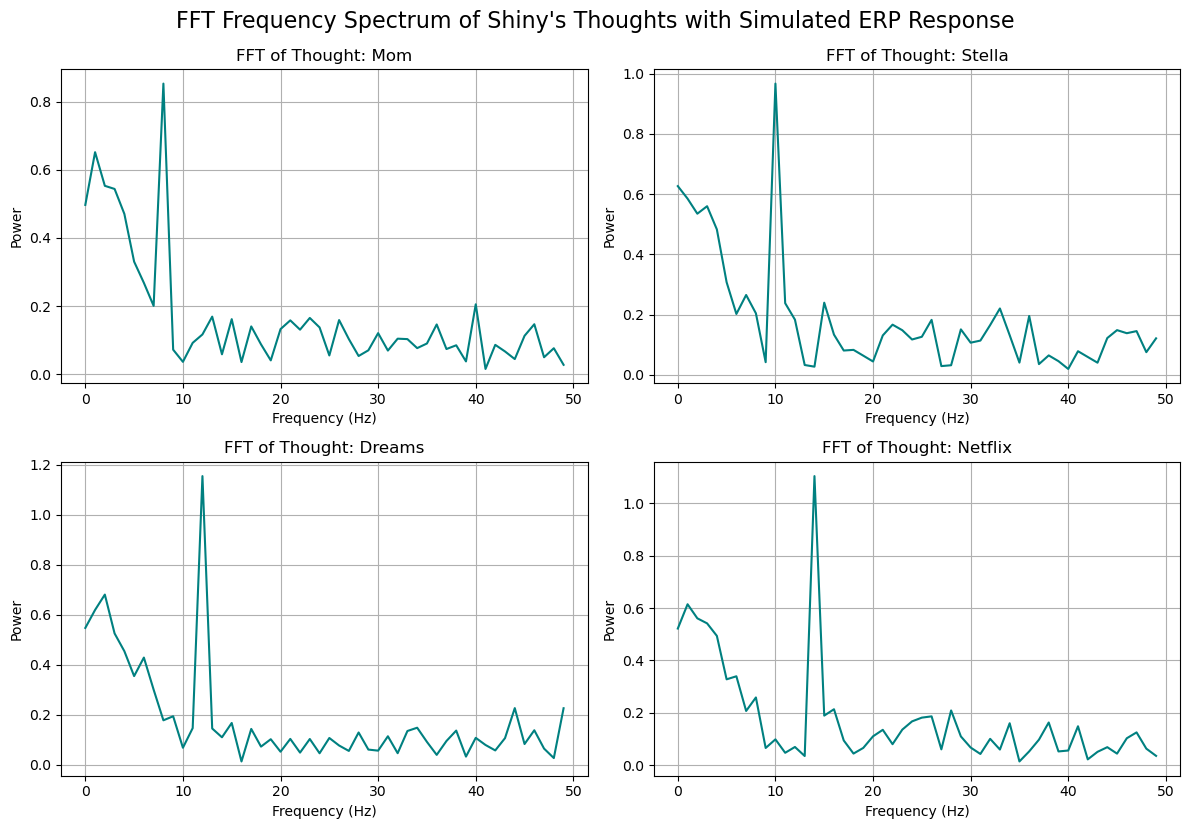

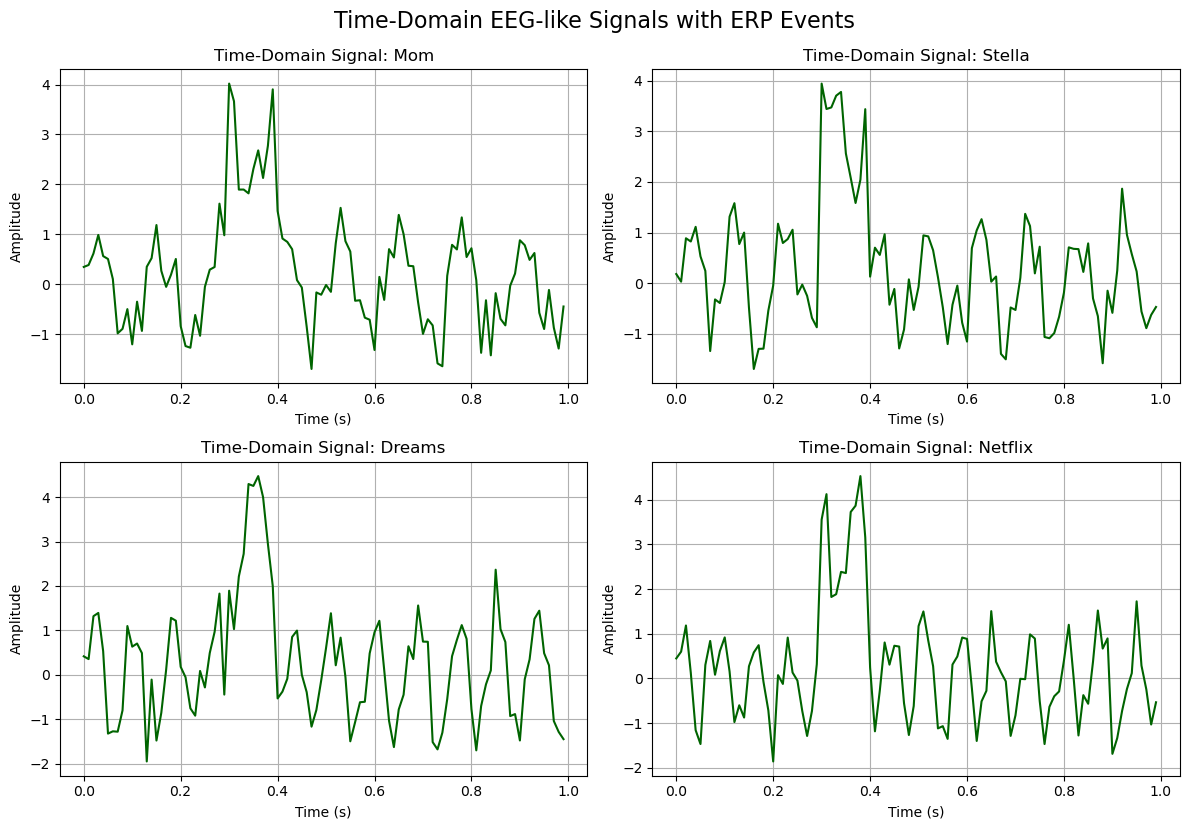


Stage 4: ML Classification with SVM
--- Classification Report ---
              precision    recall  f1-score   support

         Mom       1.00      1.00      1.00         2
     Netflix       1.00      1.00      1.00         1
      Stella       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

---------------------------

Simulation complete. Check generated plots and classification report.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- Configuration ---
CATEGORIES = ['Mom', 'Stella', 'Dreams', 'Netflix']
FS = 100  # Hz (sampling frequency)
T = np.linspace(0, 1, FS, endpoint=False) # 1 second duration
ERP_DELAY = 0.3 # seconds

# --- Signal Generation ---
def generate_base_signals(categories, fs, t):
    signals = {}
    for i, category in enumerate(categories):
        # Base frequency for each category
        freq = 8 + i * 2
        # Simple sine wave + random noise
        signal = np.sin(2 * np.pi * freq * t) + 0.5 * np.random.randn(fs)
        signals[category] = signal
    return signals

def generate_erp_signal(base_freq, fs, t, delay=0.3):
    signal = np.zeros_like(t)
    start_idx = int(delay * fs)
    # Simulate ERP spike
    signal[start_idx:start_idx+10] = 3.0
    # Combine with base frequency and noise
    return np.sin(2 * np.pi * base_freq * t) + signal + 0.5 * np.random.randn(fs)

def generate_erp_enhanced_signals(categories, fs, t, erp_delay):
    signals_erp = {}
    for i, cat in enumerate(categories):
        # Base frequency for each category
        base_freq = 8 + i * 2
        signals_erp[cat] = generate_erp_signal(base_freq, fs, t, erp_delay)
    return signals_erp

# --- Visualization Functions ---
def plot_fft(signals, fs, title_suffix=""):
    plt.figure(figsize=(12, 8))
    for idx, (category, signal) in enumerate(signals.items()):
        yf = fft(signal)
        xf = fftfreq(fs, 1 / fs)[:fs // 2]
        power = 2.0 / fs * np.abs(yf[:fs // 2])

        plt.subplot(2, 2, idx + 1)
        plt.plot(xf, power, color='teal')
        plt.title(f'FFT of Thought: {category}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.grid(True)
    plt.tight_layout()
    plt.suptitle(f"FFT Frequency Spectrum of Shiny's Thoughts {title_suffix}", fontsize=16, y=1.03)
    plt.show()

def plot_time_domain(signals, t, title_suffix=""):
    plt.figure(figsize=(12, 8))
    for idx, (cat, signal) in enumerate(signals.items()):
        plt.subplot(2, 2, idx + 1)
        plt.plot(t, signal, color='darkgreen')
        plt.title(f'Time-Domain Signal: {cat}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
    plt.tight_layout()
    plt.suptitle(f"Time-Domain EEG-like Signals {title_suffix}", fontsize=16, y=1.03)
    plt.show()

# --- Machine Learning ---
def classify_signals(signals_erp, fs):
    X = []
    y = []
    for cat, signal in signals_erp.items():
        yf = fft(signal)
        power = 2.0 / fs * np.abs(yf[:fs // 2])
        X.append(power)
        y.append(cat)

    # Replicate data to have more samples for training
    X = np.array(X * 5)
    y = np.array(y * 5)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("--- Classification Report ---")
    print(classification_report(y_test, y_pred))
    print("---------------------------")
    return classification_report(y_test, y_pred, output_dict=True)


# --- Main Execution ---
if __name__ == "__main__":
    print("Starting Brainwave Thought Recognition Simulation...")

    # Stage 1: Generate and Plot FFT of base signals
    print("\nStage 1: FFT Frequency Analysis")
    base_signals = generate_base_signals(CATEGORIES, FS, T)
    plot_fft(base_signals, FS, "without ERP")

    # Stage 2 & 3: Generate ERP enhanced signals and plot both FFT and Time-Domain
    print("\nStage 2 & 3: FFT with ERP & Time-Domain Plots")
    erp_enhanced_signals = generate_erp_enhanced_signals(CATEGORIES, FS, T, ERP_DELAY)
    plot_fft(erp_enhanced_signals, FS, "with Simulated ERP Response") # Re-using FFT plot function
    plot_time_domain(erp_enhanced_signals, T, "with ERP Events")

    # Stage 4: ML Classification
    print("\nStage 4: ML Classification with SVM")
    report_dict = classify_signals(erp_enhanced_signals, FS)

    # You might want to save the plots and report to the 'results' folder here
    # Example for saving:
    # plt.savefig('results/fft_plots/fft_with_erp.png')
    # with open('results/classification_report.txt', 'w') as f:
    #     f.write(classification_report(y_test, y_pred))

    print("\nSimulation complete. Check generated plots and classification report.")